<img src="https://graphblas.github.io/logo.png"  width="226" height="209">

<h1><span style="color:#267CB9;">A Graph Linear Algebra API</span></h1>

👋 Brian Sam-Bodden - CSCI E-82 Fall 2021

📧 `brs017@g.harvard.edu` / `bsb@redis.com` 

🐦 `@bsbodden`

## GraphBLAS in ~20 Minutes

- Graphs Everywhere!
- Graph/Matrix Duality
- Why should you care?
- GraphBLAS 
- PyGraphBLAS 
- GraphBLAS Operations
- Graph Algorithms
- Breadth-First Search Revisited

## Graphs

- Graphs are a **natural** and **essential** abstraction for a wide range of problems
  - model relationships in physical, biological, social and information systems
- Graph Theory can be distilled to the study of **relationships between entities**
- Directed graphs can explicitely model chains of events
- Once your data is in graph form many disciplines provide approaches to analyze them:
  - Graph Theory
  - Topology / Knot Theory
  - Topologycal Graph Theory
  

## Graphs are Everywhere!

#### Event Graphs

<img src="https://miro.medium.com/max/2000/1*WDfNV4TfCn0XXofNLl5AGw.png" width="600" height="300">

## Graphs are Everywhere!

#### Computer Networks

<img src="https://cpb-us-e1.wpmucdn.com/blogs.cornell.edu/dist/a/1688/files/2015/10/iinterent-1m4l3eg.png" width="621" height="300">

## Graphs are Everywhere!

#### Disease Pathways

<img src="https://www.researchgate.net/profile/Christine-Van-Broeckhoven/publication/43133721/figure/fig2/AS:202543738167299@1425301598667/Overview-of-several-disease-pathways-involved-in-AD-pathogenesis-Causal-AD-genes-and-AD.png">

## Graphs are Everywhere!

#### Citation Networks

<img src="https://www.researchgate.net/publication/311652283/figure/fig1/AS:439540008656897@1481805912329/Schematic-presentation-of-citation-networks-using-a-multilayer-network-The-three.png" width="723" height="300">

## Graphs are Everywhere!

#### Knowledge Graphs

<img src="https://yashuseth.files.wordpress.com/2019/10/knowledge-graph.jpg" width="600" height="300">

## Graphs are Everywhere!

#### Scene Graphs

<img src="https://media.arxiv-vanity.com/render-output/5424603/figs/fig_example2.png" width="600" height="300">

## Graphs are Everywhere!

#### Molecular Graphs

<img src="https://pubs.rsc.org/image/article/2020/RA/d0ra02297g/d0ra02297g-f2_hi-res.gif">

## Graphs are Everywhere!

#### Code Graphs 

<img src="https://www.researchgate.net/profile/Eric-Van-Wyk/publication/249425894/figure/fig1/AS:668937188556806@1536498462320/C-program-a-and-its-AST-and-control-flow-graph-b.png">

## Graphs are Everywhere!

#### Polygon Mesh

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Dolphin_triangle_mesh.png">

## Why should you care?

- Graphs **explicitly** encode relationships
- Graphs provide **scalable** knowledge representations of a system 
- Graphs are **composable** 
  - Think cross-domain graphs merging in different ways
- Universal language for describing complex data
  - Graphs are a natural vehicle to human understanding of a subject
- Explicit relationships are **explainable**
- Graph Neural Networks have recently shown great promise in many domains

# GraphBLAS

- One way to represent a Graph in software is to use a **Matrix**
    - Specifically an **Adjacency Matrix**
    
![](https://qph.fs.quoracdn.net/main-qimg-4539f90b561ff2669bd811c00d36ddc2)

## GraphBLAS

- The traditional **"pointer-following"** approaches have large **communication-to-computation** ratio
    - Making Graph Algorithms computationally very expensive
    - Complex to implement
- **"Graphs as Linear Algebra"** approach to Graph Computing has gained a lot of attention (again) recently
- But **Dense** Matrices **waste** a lot of **space**...
    - and most real-world graphs tend to be **sparse**
    - Facebook ~2 billion users - ~350 friends for user on average
    - 2,000,000,000 * 350 / 2,000,000,000^2 ~ **0.000000175%** utilization


## GraphBLAS

- Encodes Graphs as **Sparse Adjacency Matrices**
    - storing only the non-zero entries
    - storage specific data structures up to the implementers
        - Typically CSR (Compressed Sparse Row) or CSC (Compressed Sparse Column)
- Uses **Vector** / **Matrix** operations to implement **Graph Algorithms**
- GraphBLAS is a **specification** for the foundational constructs of **"Graphs as Linear Algebra"**
- Several implementations available. Today we'll look at [PyGraphBLAS](https://github.com/Graphegon/pygraphblas)

## PyGraphBLAS

- **pip**: `pip install pygraphblas`
- **docker**: `docker run --rm -it -p 8888:8888 graphblas/pygraphblas-notebook`
- **conda**: `conda install -c conda-forge pygraphblas`


In [154]:
# imports I'm using today...
import numpy as np
from pygraphblas import *
from pygraphblas.gviz import draw, draw_matrix, draw_graph, draw_graph_op
from scipy.sparse import csr_matrix
from boltons.setutils import IndexedSet

In [155]:
import sys
!{sys.executable} -m pip install boltons

## PyGraphBLAS

- Let's build and visualize a matrix using PyGraphBLAS

In [156]:
# create a matrix of numpy arrays
dense = np.array([
  [0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0]
])

In [157]:
# use Sparse matrices (scipy.sparse) 
# https://docs.scipy.org/doc/scipy/reference/sparse.html
def gbm_from_dense(dense):
  # use the 0 as our mask
  masked = np.ma.masked_values(dense, 0)
  # create a sparse matrix from the masked dense matrix
  sparse = csr_matrix(dense)
  # create a GraphBlas matrix
  return Matrix.from_scipy_sparse(sparse)

def plot_matrix(gbm):
  return draw_matrix(gbm, scale=50, labels=True, axes_labels=True, cmap="Wistia")

def plot_graph(gbm, label_vector=None):
  # draw the graph
  ioff = gbm.nrows
  joff = gbm.ncols
  return draw_graph(gbm, label_vector=label_vector, ioff=ioff, joff=joff)

In [158]:
gbm = gbm_from_dense(dense)
print(gbm)

      0  1  2  3  4  5  6
  0|           1         |  0
  1|                     |  1
  2|                     |  2
  3|  1                  |  3
  4|                     |  4
  5|                     |  5
  6|                     |  6
      0  1  2  3  4  5  6


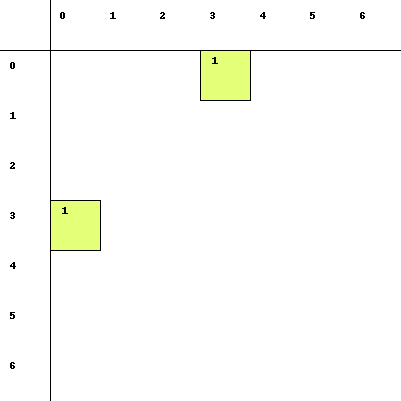

In [159]:
plot_matrix(gbm)

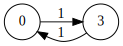

In [160]:
plot_graph(gbm)

## PyGraphBLAS

- Let's make our graph a little more involved...

In [161]:
dense = np.array([
  [0, 1, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 1],
  [0, 0, 0, 0, 0, 1, 0],
  [1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0, 0, 0],
  [0, 0, 1, 1, 1, 0, 0]
])
gbm = gbm_from_dense(dense)

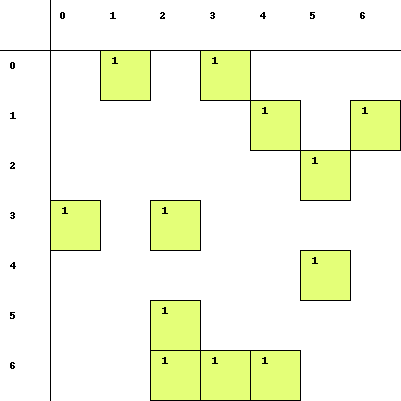

In [162]:
# 7×7adjacency matrix - A representation of the graph
plot_matrix(gbm)

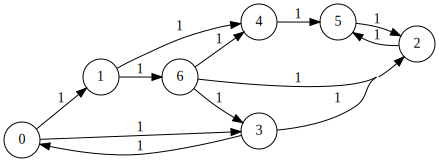

In [163]:
# Seven-vertex graph with 12 edges
# - Each vertex is labeled with the integer 1.
# - has 12 nonzero entries corresponding to the edges in the graph.
plot_graph(gbm) 

## PyGraphBLAS

- Ok, keep that Graph in your mind we'll get back to it in a second...

## GraphBLAS Operations

- GraphBLAS specifies several fundamental Graph operations, including:
  - Addition
  - Transposition
  - Element-wise Multiplication
  - Matrix Multiplication

### Addition

- Adding two graphs...

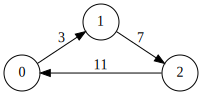

In [164]:
# lists of row indices, column, indices, and values
A = Matrix.from_lists(
  [0, 1, 2], # row indices
  [1, 2, 0], # column indices
  [3, 7, 11]  # values
)

plot_graph(A)

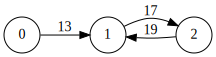

In [165]:
B = Matrix.from_lists(
  [0, 1, 2], # row indices
  [1, 2, 1], # column indices
  [13, 17, 19]  # values
)

plot_graph(B)

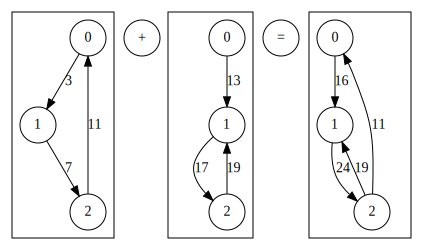

In [166]:
C = A + B
draw_graph_op(A, '+', B, C)

### Transpose

- Toggling all the relationships

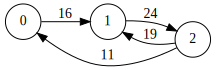

In [167]:
# take Graph C ...that we just created
plot_graph(C)

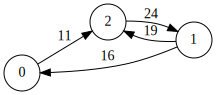

In [168]:
# and transpose it
Ct = C.transpose()
plot_graph(Ct)

### Element-wise Multiplication

- Give two graph with the same nodes but different weights, it multiplies the weights
- Missing links in one graph remove the link in the resulting graph (`x` `0`)

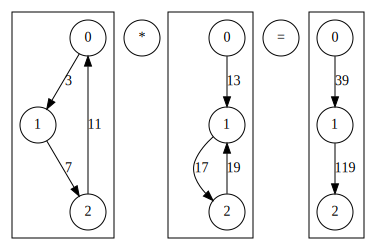

In [169]:
C = A * B
draw_graph_op(A, '*', B, C)

### Matrix Multiplication - FOAF

- Matrix multiplication on the same matrix gives FOAF functionality (Friend-Of-A-Friend)
- Matrix multiplicaiton allows us to skip one hop forward in the graph

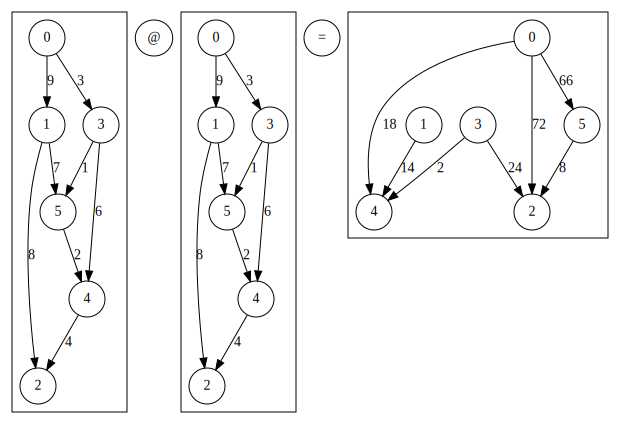

In [170]:
# multiply the graph by itself to skip one hop forward in the graph
social = Matrix.from_lists(
    [0, 0, 1, 3, 3, 4, 1, 5],
    [1, 3, 2, 4, 5, 2, 5, 4],
    [9, 3, 8, 6, 1, 4, 7, 2],
)

draw_graph_op(social, '@', social, social @ social)

### Semirings

- Semirings have a deeper meaning in Graph Theory, but for our discussion we can think of them as a pair of binary operations packaged together
- One additive operation and a multiplicative operation
- Semirings can be used in conjunction with the `@` operator
- For example, GraphBLAS's `min_plus` semiring is [Min-plus matrix multiplication](https://en.wikipedia.org/wiki/Min-plus_matrix_multiplication)
    - A.K.A. the "distance product"
    - The weights are the sum of the minimum weights along the path

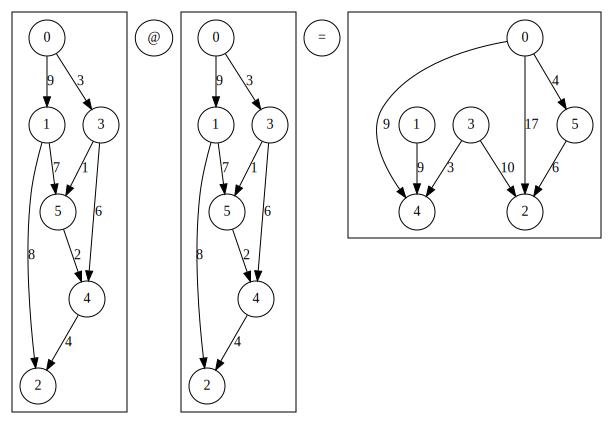

In [171]:
draw_graph_op(social, '@', social, social.min_plus(social))

## Graph Algorithms

- **Prediction**  
  - **Node classification**: In what category does this belong? What is this thing?
  - **Link prediction**: Discover relationships between nodes
- **Identification**:
  - **Clusters**: Find densely linked clusters of nodes
- **Comparison**:
  - **Similarity**: Compare nodes, compare whole graphs
  

## Graph Algorithms

### Path Finding Algorithms

Find the shortest path between two or more nodes or evaluate the availability and quality of paths:

- Dijkstra Source-Target
- Dijkstra Single-Source
- A*
- Yen’s algorithm
- Minimum Weight Spanning Tree
- Single Source Shortest Path
- All Pairs Shortest Path
- Random Walk
- **Breadth First Search**
- Depth First Search
  

## Graph Algorithms

### Centrality Algorithms

Determine the importance of distinct nodes in a graph:

- Page Rank
- Article Rank
- Eigenvector Centrality
- Betweenness Centrality
- Degree Centrality
- Closeness Centrality
- Harmonic Centrality
- HITS
- Influence Maximization

## Graph Algorithms

### Community detection

Evaluate how nodes are clustered or partitioned, and their tendency to strengthen or break apart:

- Louvain
- Label Propagation
- Weakly Connected Components
- Triangle Count
- Local Clustering Coefficient
- K-1 Coloring
- Modularity Optimization
- Strongly Connected Components
- Speaker-Listener Label Propagation
- Approximate Maximum k-cut

## Graph Algorithms

### Similarity

Compute the similarity of pairs of nodes using different vector-based metrics:

- Node Similarity
- K-Nearest Neighbors
- Approximate Nearest Neighbors
- Cosine Similarity
- Euclidean Similarity
- Jaccard Similarity
- Overlap Similarity
- Pearson Similarity

## Graph Algorithms

### Topological link prediction

Determine the closeness of a pair of nodes using the topology of the graph:

- Adamic Adar
- Common Neighbors
- Preferential Attachment
- Resource Allocation
- Same Community
- Total Neighbors

## Graph Algorithms

### Node Embeddings

Compute low-dimensional vector representations of nodes in a graph. These vectors, also called embeddings, can be used for **machine learning**:

- FastRP
- GraphSAGE
- Node2Vec

## Graph Algorithms

### Node Classification

Mostly machine learning techniques to predict the classification of nodes:

- DeepWalk
- GNNs of various flavors

## BFS - Breadth-First Search

- BFS is a tree-traversal algorithm
- BFS can be easily implemented using recursion and data structures like dictionaries and lists
- Let's look at a basic Python implementation that can be applied to the a dense graph (Matrix)...


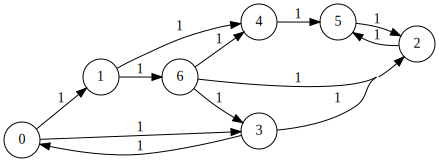

In [172]:
# Remember our Seven-vertex graph with 12 edges
# - Each vertex is labeled with the integer 1.
# - has 12 nonzero entries corresponding to the edges in the graph.
plot_graph(gbm)

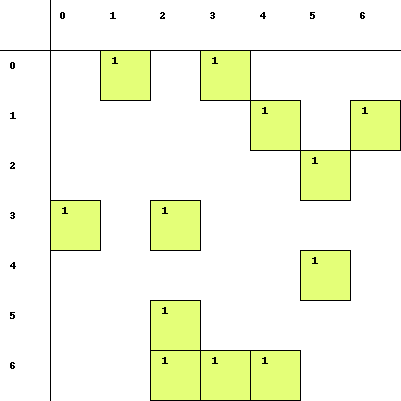

In [173]:
# Which was built using the 7×7adjacency matrix 
plot_matrix(gbm)

In [174]:
# naive loopy breadth-first search
def loopy_bfs(graph, node_idx):
  visited = IndexedSet([node_idx])
  queue = [node_idx]  

  while queue:
    s = queue.pop(0) 

    for idx in range(0, len(graph[s])):
      if (graph[s][idx] != 0) and (idx not in visited):
        visited.add(idx)
        queue.append(idx)
        
  return visited

In [175]:
loopy_bfs(dense, 3)

IndexedSet([3, 0, 2, 1, 5, 4, 6])

## BFS with GraphBLAS

- 💡Key observation - BFS is the same as a matrix / vector multiplication 
- Matrix 👉Our Graph
- Vector 👉Sparse Vector representing the starting Node

In [176]:
# Create a sparse vector representing node 3
v = Vector.from_lists([3], 1, dense.shape[0])
print(v)

0|
1|
2|
3| 1
4|
5|
6|


In [177]:
# multipliying the graph sparse matrix x vector gives us the node incoming connections
gbmXv = gbm @ v

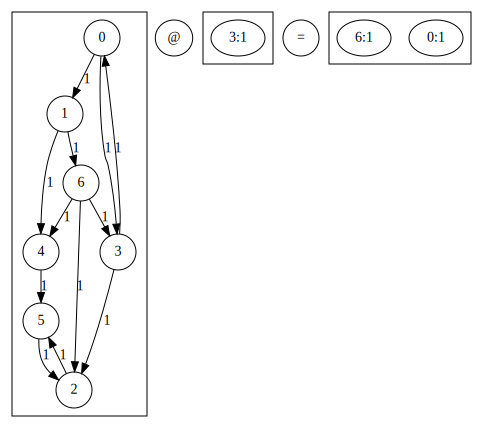

In [178]:
draw_graph_op(gbm, '@', v, gbmXv)

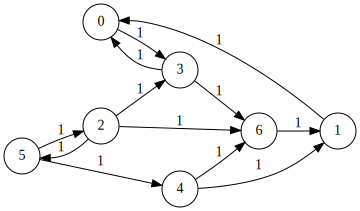

In [179]:
# to get outgoing connections we need to transpose the graph/matrix 
gbmt = gbm.transpose()
plot_graph(gbmt)

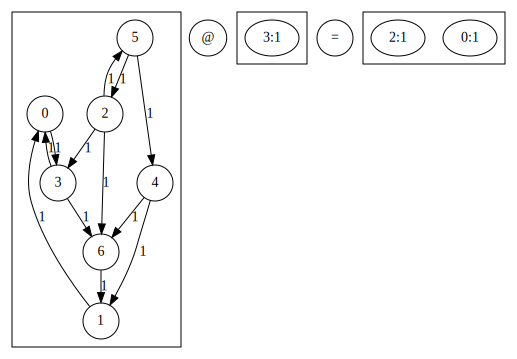

In [180]:
gbmtXv = gbmt @ v
draw_graph_op(gbmt, '@', v, gbmtXv)

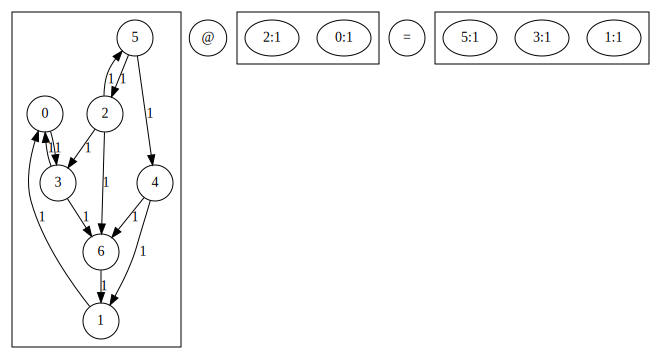

In [181]:
gbmtXv2 = gbmt @ gbmtXv
draw_graph_op(gbmt, '@', gbmtXv, gbmtXv2)

In [182]:
# GraphBLAS BFS
def gb_bfs(gmb, node_idx):
  nrows = gmb.size
  gbmt = gbm.transpose()

  traverse = True
  visited = IndexedSet([node_idx]) # visited nodes.
  neighbors = [node_idx]

  while (traverse):
    v = Vector.from_lists(neighbors, 1, dense.shape[0])
    r = gbmt @ v
    neighbors = r.to_lists()[0]
    traverse = len(IndexedSet(neighbors).difference(visited)) > 0
    visited.update(neighbors)

  return visited

In [183]:
gb_bfs(dense, 3)

IndexedSet([3, 0, 2, 1, 5, 4, 6])

## In Closing...

- Graphs are everywhere, most everything can be turned into a Graph
- GNNs are emerging and CGNNs (Convolutional Graph Neural Neworks) are SoA for certain domains
- Building fast, efficient and distributable Graphs and Graph Algorithms is hard
- GraphBLAS formally sets to build a standard and a family of Graph Algorithms using Linear Algebra
- Even if you don't have to implement an Algorithm... 
  - it is likely you'll have a GraphBLAS implementation under the covers!
- Presentation Notebook available at [`https://github.com/bsbodden/graphblas-intro`](https://github.com/bsbodden/graphblas-intro)

## Suggested Reading

![](https://images-na.ssl-images-amazon.com/images/I/41ZowdmxyBL._SX345_BO1,204,203,200_.jpg)
[Amazon Link](https://www.amazon.com/Algorithms-Language-Algebra-Software-Environments/dp/0898719909)